# 5-2
在真正拿到餐廳工作前，Sanjay 至少要先釐清：

1.平均可以領多少──用來和顧問工作的穩定年薪比較。

2.可能會多慘──收入波動及虧損機率是否在可承受範圍內。

透過簡易蒙地卡羅模擬，他能把「感覺」量化成看得見的數字與分布，做出更有把握的職涯選擇，以下是範例

平均月薪 (E[Profit])       : $15,101
月薪低於顧問薪資的機率     : 0.00%
最差 5% 月薪 (VaR 5%)      : $13,306


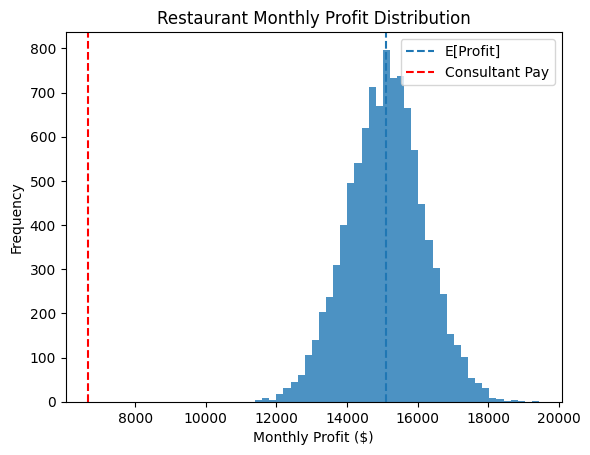

In [3]:
# 假設
# 平均每日來客數 120，標準差 20（可視淡旺季自行調整）。
# 每位顧客平均消費 $15。
# 食材等可變成本佔營收 35%。
# 每月固定成本（房租、人事、水電…）$20,000。
# 模擬 10,000 個月份。

import numpy as np
import matplotlib.pyplot as plt

# 讓結果可重現
np.random.seed(42)

# ----------- 參數區 ------------
SIM_RUNS = 10_000         # 模擬月份數
AVG_CUSTOMERS = 120       # 平均每日客數
CUSTOMER_STD = 20         # 客數標準差
AVG_SPEND = 15            # 人均消費金額 (USD)
FOOD_COST_RATE = 0.35     # 食材成本佔營收比例
FIXED_COST = 20_000       # 每月固定成本
CONSULTANT_MONTHLY = 80_000 / 12  # 顧問月薪基準
# -------------------------------

# 1. 建立模擬
monthly_profit = []
for _ in range(SIM_RUNS):
    # 每月 30 天的每日客數（常態分布，負值裁成 0）
    daily_customers = np.random.normal(
        AVG_CUSTOMERS, CUSTOMER_STD, 30
    ).clip(min=0)
    revenue = daily_customers.sum() * AVG_SPEND       # 營收
    variable_cost = revenue * FOOD_COST_RATE
    profit = revenue - variable_cost - FIXED_COST     # 當月淨利
    monthly_profit.append(profit)

monthly_profit = np.array(monthly_profit)

# 2. 指標計算
expected_salary = monthly_profit.mean()                           # (A) 平均月薪
risk_prob = (monthly_profit < CONSULTANT_MONTHLY).mean()          # (B) 低於顧問薪資機率
var_5 = np.percentile(monthly_profit, 5)                          # 5% VaR

# 3. 結果輸出
print(f"平均月薪 (E[Profit])       : ${expected_salary:,.0f}")
print(f"月薪低於顧問薪資的機率     : {risk_prob:.2%}")
print(f"最差 5% 月薪 (VaR 5%)      : ${var_5:,.0f}")

# 4. 分布圖
plt.hist(monthly_profit, bins=40, alpha=0.8)
plt.axvline(expected_salary, linestyle='--', label='E[Profit]')
plt.axvline(CONSULTANT_MONTHLY, color='red', linestyle='--', label='Consultant Pay')
plt.title('Restaurant Monthly Profit Distribution')
plt.xlabel('Monthly Profit ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
